<h3>Introduction</h3>

Spotify is one of the most popular music streaming service in the world. Songs of various styles and genres are published on the platform by both indie and professional artists from all over the world. As an asprirant artist who is intending to publish his/her song on the platform, one might be interested to predict how much popluarity the song is going to get based on its characteristics such tempo, key or loudness. In this analysis, we're going to look into a Spotify song dataset of 160,000 songs to explore the relationship between features of a song and its popularity. A predictive model will then be built to predict how well a song would do on Spotify based on the song's characteristics.

On Spotify, beside song tracks, there are also a great amount of audiobooks, podcast or noise tracks. In this dataset, there is a good mix of different types of tracks so we're going to filter out tracks which are not songs. Only songs data entries will be used to build the predictive model.

Lastly, we're going to make a distinction between studio recorded track and live track. Our focus in this analysis is on studio recoded tracks only. Therefore, live session recording shall not be considered.

<h3>Dataset</h3>

The dataset is named 'Spotify Dataset 1921-2020, 160k+ Tracks' and was published by user Yamac Eren Ay on Kaggle. Homepage of the dataset where details can be found is accessible <a href = 'https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks'>here</a>. 

It contains more than records of more than 160,000 tracks and was collect using Spotify Web API. There are 19 columns in the dataset, description of each column is as follow:
<ul>
    <b>Primary:</b>
    <br><br>
    <li><b style="color:Tomato;">id</b>: string value <br>Unique Spotify identifier for each track</p></li>
    <br>
    <b>Numerical:</b>
    <br><br>
    <li><b style="color:Tomato;">acousticness</b>: float value ranges from 0 to 1</li>
    Confidence measure of whether the track is acousitc.
    <br><br>
    <li><b style="color:Tomato;">danceability</b>: float value ranges from 0 to 1</li>
    Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    <br><br>
    <li><b style="color:Tomato;">energy</b>: float value ranges from 0 to 1</li>
    Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
    <br><br>
    <li><b style="color:Tomato;">duration_ms</b>: integer value, ~250,000 <br>The duration of the track in milliseconds</li>
    <br>
    <li><b style="color:Tomato;">instrumentalness</b>: (Ranges from 0 to 1)</li>
    Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    <br><br>
    <li><b style="color:Tomato;">valence</b>: (Ranges from 0 to 1)</li>
    A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    <br><br>
    <li><b style="color:Tomato;">popularity</b>: (Ranges from 0 to 100)</li>
    The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
    <br><br>
    <li><b style="color:Tomato;">tempo</b>: (Float typically ranging from 50 to 150)</li>
    The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    <br><br>
    <li><b style="color:Tomato;">liveness</b>: (Ranges from 0 to 1)</li>
    Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    <br><br>
    <li><b style="color:Tomato;">loudness</b>: (Float typically ranging from -60 to 0)</li>
    The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks
    <br><br>
    <li><b style="color:Tomato;">speechiness</b>: (Ranges from 0 to 1)</li>
    Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    <br><br>
    <li><b style="color:Tomato;">year</b>: (Ranges from 1921 to 2020)</li>
    The year a track was published
    <br><br>
    <b>Dummy:</b>
    <br><br>
    <li><b style="color:Tomato;">mode</b>: (0 = Minor, 1 = Major)</li>
    <br>
    <li><b style="color:Tomato;">explicit</b>: (0 = No explicit content, 1 = Explicit content)</li>
    <br>
    <b>Categorical:</b>
    <br><br>
    <li><b style="color:Tomato;">key</b>: (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)</li>
    <br>
    <li><b style="color:Tomato;">artists</b>: (List of artists mentioned)</li>
    <br>
    <li><b style="color:Tomato;">release_date</b>: (Date of release mostly in yyyy-mm-dd format, however precision of date          may vary)</li>
    <br>
    <li><b style="color:Tomato;">name</b>: (Name of the track)</li>
</ul>

Let's take a look at an example record of the song "Radio Ga Ga" by "Queen". Value of 'key' field being 5 indicates that the song is in key F Major. One interesting feature of this track is 'valence' which the song has a score of 0.632. This tells us that the song is musically positive or, in another word, sounds cheerful and upbeat, which is really the case for the song "Radio Ga Ga". Another interesting metric of this song is the 'danceability' score, which it scores an impressive 0.752. This is again understandable since the song, with a simple and catchy beat, is easy to dance to.

It is important to note that these numerical metrics are given to each song using Spotify own machine learning model and aren't assigned human so we can assume that scores for different attributes of each song are given fairly consistently. In order to create an actual test case for a new track, it is important to get values for features of interest through Spotify API rather than having someone artist to assign scores to the track based on his/her feeling. More information on Spotify Web API can be found <a href=’ttps://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/’>here</a>

The key data which describe the attributes of a track such as <b>danceability</b>, <b>acousticness</b>, <b>loudness</b>, ... are already in numerical format and are already normalized so that will help a lot in the data wrangling process. Data field such as 'artists' or 'name', though might very well have an impact on the popularity of a song, will not be used in this model since in the scope of this analysis, we only want to focus on the muscial virtues of a song.

The dataset was last updated on 19 June, 2020 so it is still highly relevant at the point of writing of this notebook. However, if this model is to be used at some point in the future, it is recommended to update dataset. Data is valid for the US region only.

In [1]:
# Import relevant libraries and read data from .csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


spot = pd.read_csv('data.csv')
spot.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [2]:
# For the example in 'Dataset' section
spot[spot['name']=='Radio Ga Ga']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
84438,0.151,['Queen'],0.752,348173,0.375,0,2jAc9KIQ9XoZxkydXh3MVh,0.000481,5,0.143,-12.966,1,Radio Ga Ga,52,1984-02-27,0.0358,112.415,0.632,1984


<h3>Methodology</h3>
First we're going to do some exploratory analysis to have a preliminary understanding of the dataset. Next, we're going to clean up the dataset by filtering out data entries which are not valid, followed by data normalization. 
Lastly, we're going to select which attributes to use as independent variables in building the predictive model.
Since the variable we're trying to predict is a countinuous value, we're going to use a Regression model, more details below.

In [3]:
print(spot.shape)
print(spot.dtypes)

(169909, 19)
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object


In [4]:
spot.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


We can see there is no missing data across the fields


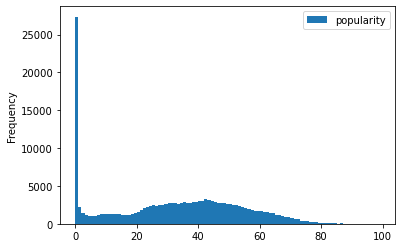

0      27357
42      3280
43      3120
40      3061
44      3054
       ...  
93         3
97         1
96         1
99         1
100        1
Name: popularity, Length: 100, dtype: int64


In [5]:
bins = np.arange(0, 100, 1)
spot.plot(kind='hist', y='popularity', bins=bins)
plt.show()
print(spot.popularity.value_counts())

there are 27357 tracks with 0 popularity score, which is a disproportinate amount as show in the distribution graph below
Let's investigate the reasons for this 0 rating, keepi in mind that popularity is calculated mostly using counts of listen and how recent those listens are

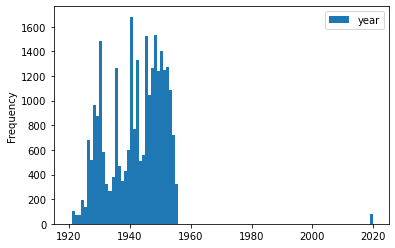

In [6]:
spot_zero = spot[spot.popularity == 0]
bins = np.arange(1920, 2021, 1)
spot_zero.plot(kind='hist', y='year', bins=bins)
plt.show()

It's clear that the majority of the 0-popularity tracks are tracks published before 1960
these songs are probably too old for the current user base (largely millenials) to know about
Therefore, these songs don't receive enough plays to get a popularity score. Some of these 
songs might become more popular if somehow the user base decide to give all these old tracks
a try, however there's no way to know for sure. Due to this uncertainty, it's best to drop these
records because there is no relationship between popularity score and a track's attributes

In [7]:
print(spot[spot.popularity==0][spot.year==2020][['artists']].squeeze().unique())

["['Tame Impala']" "['Morat']" "['Morat', 'Juanes']" "['Summer Walker']"
 "['Usher', 'Tyga']" "['Wisin & Yandel', 'Anthony Santos']"
 "['Wisin & Yandel', 'Chris Brown', 'T-Pain']" "['Wisin & Yandel']"
 "['Wisin & Yandel', 'Jennifer Lopez']" "['Arijit Singh']"
 "['Arijit Singh', 'Shadab Faridi']" "['Arijit Singh', 'Shreya Ghoshal']"
 "['Flo Rida']" "['Jack Johnson']" "['Ne-Yo']" "['Becky Hill']"
 "['Alejandro Fernández', 'Christina Aguilera']"
 "['Alejandro Fernández', 'Morat']" "['Luis Fonsi']"
 "['Luis Fonsi', 'Aleks Syntek', 'Noel Schajris', 'David Bisbal']"
 "['Luis Fonsi', 'Demi Lovato']" "['Stevie Wonder']" "['Dean Lewis']"
 "['Johann Sebastian Bach', 'Lucas Jussen', 'Arthur Jussen']"
 "['Marc Anthony']" "['Juanes']" "['Juanes', 'Nelly Furtado']"
 "['Alejandro Sanz']" "['Jax Jones', 'Ina Wroldsen']"
 "['Cali Y El Dandee', 'Sebastian Yatra']" "['Bryan Adams']"
 "['Dire Straits']"
 "['J Balvin', 'Yandel', 'Farruko', 'Nicky Jam', 'De La Ghetto', 'Daddy Yankee', 'Zion', 'Arcangel']"
 

<ipython-input-7-76ff31b8f52d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(spot[spot.popularity==0][spot.year==2020][['artists']].squeeze().unique())


There's a small group of tracks published recently but also have a 0 popularity score
A quick querry shows that these tracks are by relatively popular artists so the reason for 0 popularity score
might be because these tracks were released too recently that they haven't got enough time to gather
enough plays to get a score
Same as above, we're going to drop these records. 

In [8]:
spot[spot.popularity == 0].index
spot.drop(index=spot[spot.popularity == 0].index, inplace=True)
# drop rows where popularity score = 0

According to Spotify API documentation, 'liveness' is defined as detection level of the presence of audience
Higher 'liveness' values indicate a higher probability that a certain track is a record of a live session.
A 'liveness' score of above 0.8 presents a strong likelihood that a track is live.
Since our model is meant to provide prediction for a studio recorded track, we're going to filter and discard
tracks which are highly likely to be live records.


In [9]:

print((spot.liveness > 0.8).value_counts())
# There are about 3000 tracks in this dataset which are highly likely to be live records
spot.drop(index=spot[spot.liveness > 0.8].index, inplace=True)

False    139366
True       3186
Name: liveness, dtype: int64


We're also not going to use 'liveness' as one of the predicting variables since it's not an attribute
which an artist consciously control when creating a track. As far as we're concerned, 'liveness' helps to 
classify whether a track is live or not and we're not concerned with how whether a track is live or not affects 
its popularity on Spotify.

'speechiness' above 0.66 is considered non-musical so therefore we're going to filter out those tracks as well
unlike 'liveness', 'speechiness' does characterize a track rather than simply classify whether a track is a podcast/talkshow or a song
For example, with 'speechiness' somewhere between 0.33 and 0.66 the song is most likely to be a rap song.
We can see this score as a way to quantify how melodic a song is. Therefore, we're going to keep this column to use as a predicting variable


In [10]:

spot.drop(index=spot[spot.speechiness > 0.66].index, inplace=True)
spot.shape

(138567, 19)

Now we're going to look into 'tempo' attribute
We can notice that there are tracks whose tempo is zero, let's list them out

In [11]:
spot[spot.tempo == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
2721,0.099500,['Frank Sinatra'],0.0,60280,0.906000,0,0P7TUyrm6OfIDJJKcidvnu,0.000018,1,0.366,-6.227,1,My Kind Of Town (Reprise) - Live At The Sands ...,22,1966-07,0.0,0.0,0.0,1966
3387,0.756000,['Waylon Jennings'],0.0,14708,0.048400,0,2mex2o4uA69pMcLjMtyyGb,0.000144,4,0.166,-18.198,1,Ride Me Down Easy,29,1973-07-01,0.0,0.0,0.0,1973
6930,0.931000,['Crain & Taylor'],0.0,598425,0.000075,0,3oKBZhpwrMiOhosXauv3lP,0.892000,1,0.115,-19.703,0,Ocean Waves,47,2008-10-01,0.0,0.0,0.0,2008
7411,0.111000,['Sound Dreamer'],0.0,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392000,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,2013-06-05,0.0,0.0,0.0,2013
7792,0.145000,['Fan Sounds'],0.0,500167,0.000020,0,4xu38KnbRHbRHRwdg4KFul,0.213000,6,0.114,-25.556,1,Box Fan Long Loop For Sleep,60,2017-01-01,0.0,0.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161443,0.916000,['Water Sound Natural White Noise'],0.0,63000,0.032000,0,5pGBDKBaR63vuJ4g8ialcU,0.202000,1,0.103,-30.704,1,Deep Sleep Recovery Noise,70,2020-02-25,0.0,0.0,0.0,2020
164201,0.862000,['Bill Cosby'],0.0,215280,0.770000,0,2W0KFIFBFcLBlklD7ugiw6,0.000002,9,0.694,-15.316,0,Noah: Right!,16,1963,0.0,0.0,0.0,1963
169522,0.913000,['Granular'],0.0,205161,0.000164,0,2e6fCxto7NzsnujvliBtEk,0.910000,10,0.155,-31.221,0,White Noise - 700 hz,64,2017-10-14,0.0,0.0,0.0,2017
169743,0.000013,['Naturaleza FX'],0.0,150879,0.000020,0,4UFlnhDTGyKvlhOQziDHkG,0.208000,1,0.311,-16.873,1,Colors of the Rain,68,2019-10-10,0.0,0.0,0.0,2019


Interestingly, by actually search for the track on Spotify and listen to it, 
we recognize that there are 2 groups of tracks whose tempo is zero
The first group are tracks of noises or sounds such as 'white noise' or 'water sound', which people listen to to focus or relax 
The second group comprises tracks which are actually songs for example with tempo but for some reasons, Spotify engine was unable to detect
We assume these data entries are corrupted and going to remove from the dataset

In [12]:

spot.drop(index=spot[spot.tempo == 0].index, inplace=True)
spot.shape


(138472, 19)

In [13]:
# Rename 'duration_ms' column to 'duration'
spot.rename(columns={'duration_ms':'duration'}, inplace=True)
# We're going to drop colummns not related to the analysis such as 'artists', 'id', 'release_date' & 'name', ...
spot.drop(columns=['artists', 'id', 'release_date', 'name', 'liveness', 'year'], inplace=True)

In [14]:
# Normalize 'loudness' column
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
spot.loc[:, 'loudness'] = mms.fit_transform(spot['loudness'].to_frame())
spot.describe()


,acousticness,danceability,duration,energy,explicit,instrumentalness,key,loudness,mode,popularity,speechiness,tempo,valence
count,138472.000000,138472.000000,1.384720e+05,138472.000000,138472.000000,138472.000000,138472.000000,138472.000000,138472.000000,138472.000000,138472.000000,138472.000000,138472.000000
mean,0.421318,0.548262,2.329282e+05,0.529960,0.087122,0.127792,5.200662,0.739011,0.710042,37.827922,0.071856,118.749887,0.537731
std,0.355001,0.173255,1.061279e+05,0.260163,0.282015,0.279001,3.517606,0.097110,0.453744,18.095701,0.077200,30.184993,0.261161
min,0.000000,0.055100,2.462700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.946000,0.000000
25%,0.062600,0.432000,1.750192e+05,0.323000,0.000000,0.000000,2.000000,0.688191,0.000000,25.000000,0.033900,95.390750,0.328000
50%,0.355000,0.557000,2.154400e+05,0.539000,0.000000,0.000088,5.000000,0.754971,1.000000,39.000000,0.043000,116.203500,0.548000
75%,0.773000,0.673000,2.661070e+05,0.743000,0.000000,0.025000,8.000000,0.810783,1.000000,51.000000,0.068100,137.478000,0.756000
max,0.996000,0.988000,4.270034e+06,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,100.000000,0.660000,244.091000,1.000000


In [15]:
spot.shape


(138472, 13)

After cleaning the dataset we've arrived with a dataset having 12 features and 1 label column

In [16]:
# Create dependent and independent variables
X = spot[['acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'loudness', 'speechiness']].to_numpy()
y = spot.popularity.to_numpy()

<AxesSubplot:ylabel='Correlation'>

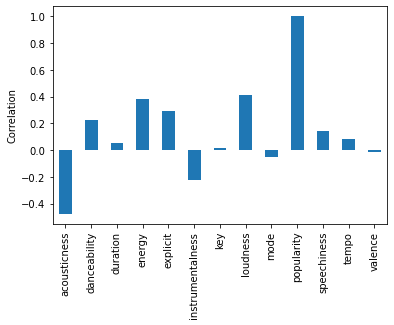

In [17]:
spot.corr().popularity.plot(kind='bar', ylabel='Correlation')

We can see there is a relatively strong correlation in 'acousticness', 'energy', 'loudness' and 'explicit'.
Interestingy, 'valence' has close to zero bearing on a track's 'popularity', which means whether the theme of the song is 'happy' or 'sad' has little impact on its popularity. A track's 'duration', 'key' and 'mode' and 'tempo' also have close to no influence over popularity

Let's explore the relationship with popularity of each individual attributes of interest

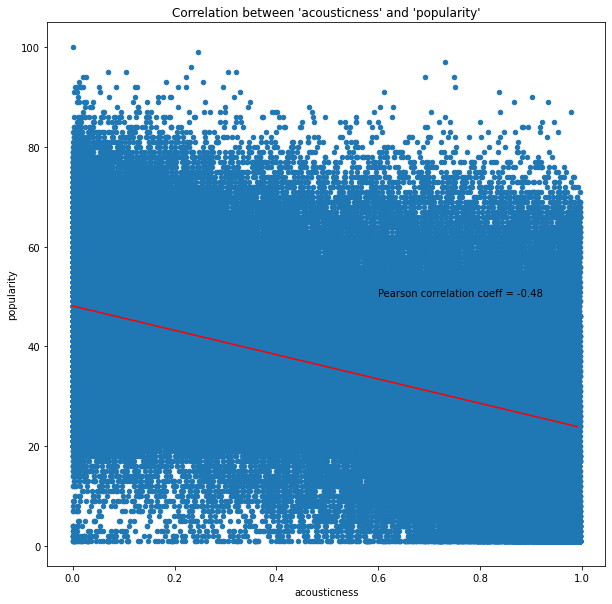

In [18]:
s_lr = LinearRegression()
s_lr.fit(X[:, 0].reshape(-1, 1), y)
corr = spot[['acousticness', 'popularity']].corr().to_numpy()

ax = spot.plot(kind='scatter', x='acousticness', y='popularity', figsize=[10, 10])
x = np.arange(0, 1, 0.01)
y_ = s_lr.intercept_ + s_lr.coef_*x
ax.plot(x, y_, color='red')
ax.set_title('Correlation between \'acousticness\' and \'popularity\'')
ax.text(0.6, 50, 'Pearson correlation coeff = {:.2f}'.format(corr[0, 1]))
plt.show()

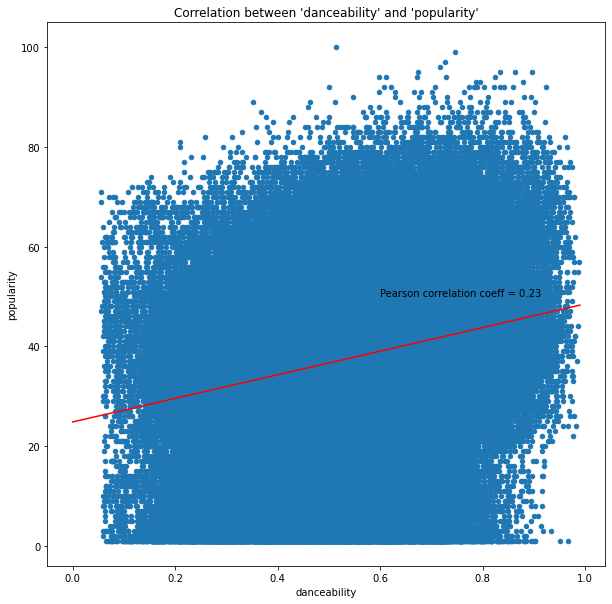

In [19]:
s_lr = LinearRegression()
s_lr.fit(X[:, 1].reshape(-1, 1), y)
corr = spot[['danceability', 'popularity']].corr().to_numpy()

ax = spot.plot(kind='scatter', x='danceability', y='popularity', figsize=[10, 10])
x = np.arange(0, 1, 0.01)
y_ = s_lr.intercept_ + s_lr.coef_*x
ax.plot(x, y_, color='red')
ax.set_title('Correlation between \'danceability\' and \'popularity\'')
ax.text(0.6, 50, 'Pearson correlation coeff = {:.2f}'.format(corr[0, 1]))
plt.show()

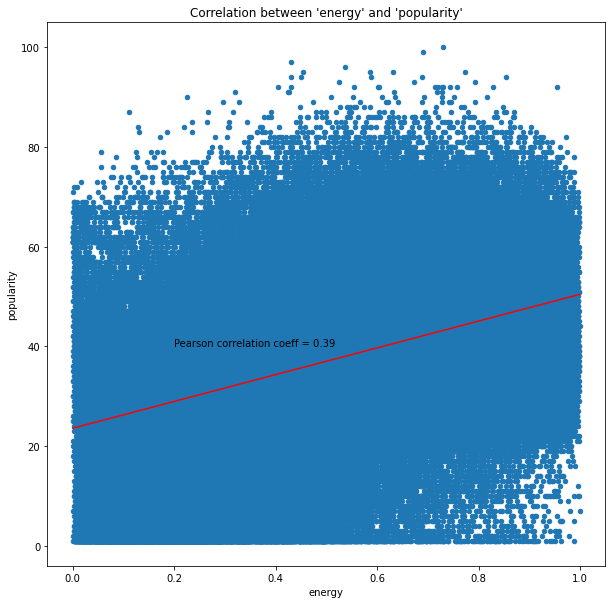

In [20]:
s_lr = LinearRegression()
s_lr.fit(X[:, 2].reshape(-1, 1), y)
corr = spot[['energy', 'popularity']].corr().to_numpy()

ax = spot.plot(kind='scatter', x='energy', y='popularity', figsize=[10, 10])
x = np.arange(0, 1, 0.001)
y_ = s_lr.intercept_ + s_lr.coef_*x
ax.plot(x, y_, color='red')
ax.set_title('Correlation between \'energy\' and \'popularity\'')
ax.text(0.2, 40, 'Pearson correlation coeff = {:.2f}'.format(corr[0, 1]))
plt.show()


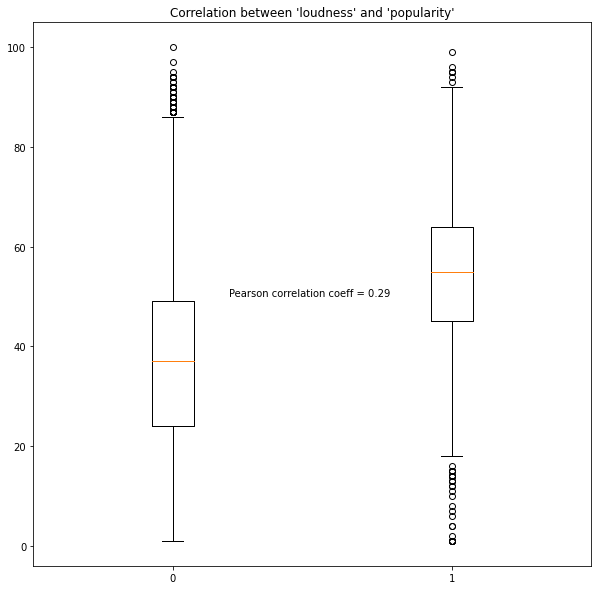

In [21]:
s_lr = LinearRegression()
s_lr.fit(X[:, 3].reshape(-1, 1), y)
corr = spot[['explicit', 'popularity']].corr().to_numpy()

ex0 = spot.groupby('explicit').get_group(0)['popularity']
ex1 = spot.groupby('explicit').get_group(1)['popularity']

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.boxplot(x=[ex0, ex1], labels=[0, 1])
ax.set_title('Correlation between \'loudness\' and \'popularity\'')
ax.text(1.2, 50, 'Pearson correlation coeff = {:.2f}'.format(corr[0, 1]))
plt.show()


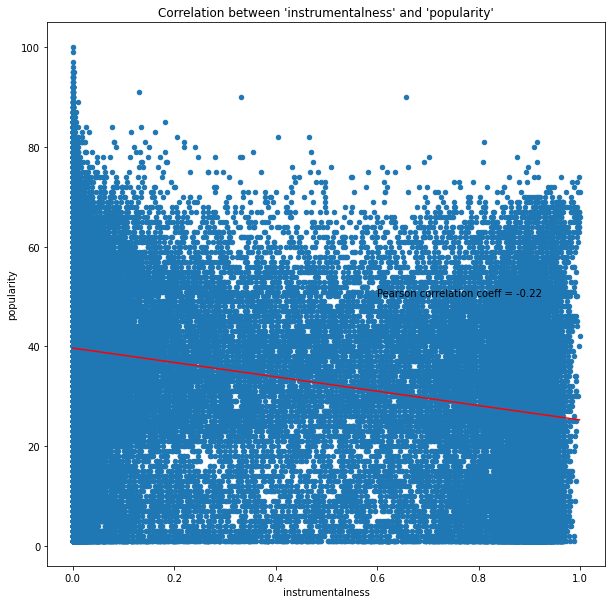

In [22]:
s_lr = LinearRegression()
s_lr.fit(X[:, 4].reshape(-1, 1), y)
corr = spot[['instrumentalness', 'popularity']].corr().to_numpy()

ax = spot.plot(kind='scatter', x='instrumentalness', y='popularity', figsize=[10, 10])
x = np.arange(0, 1, 0.001)
y_ = s_lr.intercept_ + s_lr.coef_*x
ax.plot(x, y_, color='red')
ax.set_title('Correlation between \'instrumentalness\' and \'popularity\'')
ax.text(0.6, 50, 'Pearson correlation coeff = {:.2f}'.format(corr[0, 1]))
plt.show()

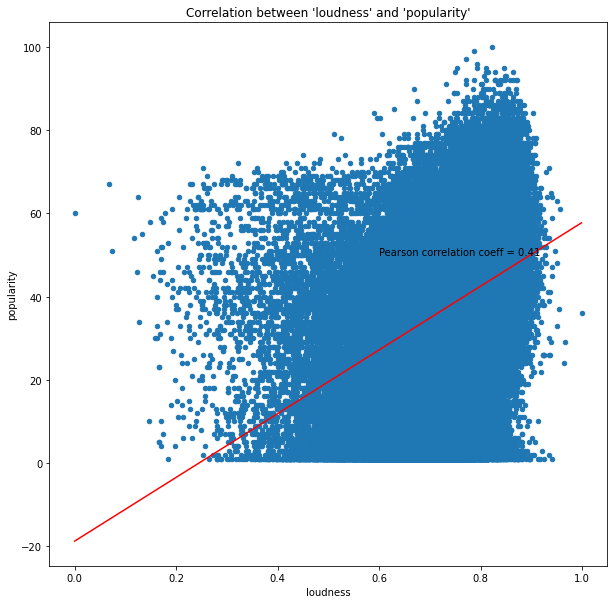

In [23]:
s_lr = LinearRegression()
s_lr.fit(X[:, 5].reshape(-1, 1), y)
corr = spot[['loudness', 'popularity']].corr().to_numpy()

ax = spot.plot(kind='scatter', x='loudness', y='popularity', figsize=[10, 10])
x = np.arange(0, 1, 0.001)
y_ = s_lr.intercept_ + s_lr.coef_*x
ax.plot(x, y_, color='red')
ax.set_title('Correlation between \'loudness\' and \'popularity\'')
ax.text(0.6, 50, 'Pearson correlation coeff = {:.2f}'.format(corr[0, 1]))
plt.show()

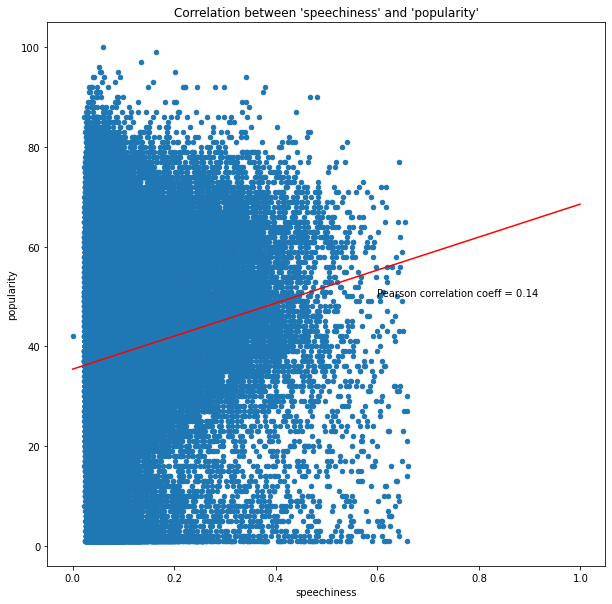

In [24]:
s_lr = LinearRegression()
s_lr.fit(X[:, 6].reshape(-1, 1), y)
corr = spot[['speechiness', 'popularity']].corr().to_numpy()

ax = spot.plot(kind='scatter', x='speechiness', y='popularity', figsize=[10, 10])
x = np.arange(0, 1, 0.001)
y_ = s_lr.intercept_ + s_lr.coef_*x
ax.plot(x, y_, color='red')
ax.set_title('Correlation between \'speechiness\' and \'popularity\'')
ax.text(0.6, 50, 'Pearson correlation coeff = {:.2f}'.format(corr[0, 1]))
plt.show()

We can see from the graphs above that the degree of correlation is not very apparent and a great amount of noise is observed for each case. 
Now we're going to create train and test set using train_test_split() function from sklearn library

In [25]:
from sklearn.model_selection import train_test_split

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96930, 7), (41542, 7), (96930,), (41542,))

Let's now first try to build a prediction model based on a Multiple Linear Regression method and evaluate its accuracy using test set, metrics for accuracy used here are Mean Absolute Error (MAE) score and R2 score

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

mean_absolute_error(y_test, y_hat), r2_score(y_test, y_hat)

(12.399115174516796, 0.28638612575513445)

Relatively decent score, on average, a prediction for the popularity score of a song is off by +- 12 points. However, we can try to improve evaluation score by trying a Polynomial Regression model

Grid search combined with cross validation method is going to be used to pick out the polynomial degree which yields the highest accuracy score.

In [27]:
pf = PolynomialFeatures(degree=2)
lr = LinearRegression()
pipe = Pipeline(steps=[('poly', pf), ('reg', lr)])

grid = {'poly__degree': [i for i in range(2, 6, 1)]}

pf.get_params()
search = GridSearchCV(pipe, grid)
search.fit(X_train, y_train)
print(search.best_score_, search.best_params_)

0.38643776545205477 {'poly__degree': 4}


A grid search with cross validation scoring return the best polynominal degree for the Polynomial Regression is 4. We're going to set the model parameter to degree=4 and test using test dataset

<h3>Results</h3>

In [28]:
pf = PolynomialFeatures(degree=4)
lr = LinearRegression()
pipe = Pipeline(steps=[('poly', pf), ('reg', lr)])

pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)


print('Mean absolute score is: {:.2f}'.format(mean_absolute_error(y_test, y_hat)))
print('R2 score is: {:.2f}'.format(r2_score(y_test, y_hat)))

Mean absolute score is: 11.37
R2 score is: 0.38


Fairly consistent with scores obtained from cross validation. 
Now let's assume we're going to compose an EDM track which is, by Spotify model's definition, very danceable, high in energy and relatively loud with a bit of rap. Let's see how well this song can do


In [29]:
# X = spot[['acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'loudness', 'speechiness']].to_numpy()

test = [[0.1, 0.6, 0.8, 1, 0.5, 0.9, 0.2]]

print(pipe.predict(test))

[52.10633809]


Such a song is predicted to receive a score of 51, which is higher 
than the mean popularity score of the dataset. Not bad!

<h3>Discussion</h3>
An R2 score of around 0.38 indicates that about 38% of the variance of the values in 'popularity' column is explained by the model. Given that this model involves human behaviours and it is in general difficult to explain why or why not a person like something, a 0.38 R2 score is acceptable as to the model's power to predict.

It is important to note that this model does not take into account the effect of the popularity of the artist, the size of such artist fanbase (and how much of it are Spotify users), or how a track is marketed. These elements could be a deciding factor as to whether a track can gain the intial traction to become more popular.

Another point to note is that this model accuracy depends greatly on how well or how accurately the Spotify machine learning model quantity attributes of a track. For instance, if Spotify model gives a track a 'energy' score of 1 but, in reality, the general perception of the track by the majority of Spotify users who have listened to the song is that it is not very energetic then this data entry will introduce noise into the model.

In order to improve this prediction model, more data about how tracks are recommended to Spotify users or how many times is a track listed under different playlists might prove to be useful. 

<h3>Conclusion</h3>

In this report we have presented an analysis on the Spotify tracks dataset. We found that there's noticeable correlation between a track's 'popularity' and its attributes such as 'loudness', 'energy' and 'acousticness'
A predictive model using Polynomial Regression was then built to predict a song's popularity on Spotify based on its intrinsic characteristics
The model achieved a reasonable R-2 score of 0.38